# Data Cleaning & Preparation:
- **Objective:** Clean and join the datasets into a single inventory_dataset
(`task_1/supplier_data_1.xlsx`, `task_1/supplier_data_2.xlsx`).
- **Task:** The following datasets are raw materials provided by two suppliers (Company A
GmbH and Company B Gmbh).
- *Document steps and decisions taken during the solving process*.


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [107]:
# let's read both the data sets and inspect the schemas
df_supplier_1 = pd.read_excel("resources/task_1/supplier_data_1.xlsx")
df_supplier_1.sample(n=5)

,Werksgüte,Bestellgütentext,Nenndicke NNN.NN mm mit Dezimalpunkt,Breite,Länge,Gewicht (kg),Cluster,Si-Gehalt,Mn-Gehalt,P-Gehalt,...,Mo-Gehalt,V-Gehalt,Cu-Gehalt,Nb-Gehalt,Ti-Gehalt,Al-Gehalt,B-Gehalt,Streckgrenze,Zugfestigkeit,Dehnung
26,G2WD8,CR440Y780T-DP,184,"1,442.0",1.407,29.28,WB-U,0.2580,1.8220,0.0120,...,0.0030,30.0,270.0,149.0,74.0,270.0,2.0,0.0,0.0,0.0
16,G37M5,58CrV4,304,"1,351.0",766.000,24.18,WB-U,0.2200,0.8540,0.0110,...,0.0080,1160.0,140.0,7.0,25.0,200.0,3.0,0.0,0.0,0.0
35,G2WD8,D7G,320,"1,677.0",769.000,31.74,WB-U,0.2490,1.8390,0.0100,...,0.0060,40.0,850.0,143.0,21.0,380.0,2.0,0.0,0.0,0.0
0,G2UB5,SZBS800,320,856.0,787.000,16.49,WB-G,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,G3UB5,SZBE800,451,727.2,557.000,14.02,Spaltband,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_supplier_2 = pd.read_excel("resources/task_1/supplier_data_2.xlsx")
df_supplier_2.sample(n=5)

,PRODUCT_TYPE,ORDER_ID,SITE,MATERIAL_NAME,MATERIAL_NUMBER,MATERIAL_QUALITY_NORM,SURFACE_COATING,DEFECT_NOTES,NOMINAL_THICKNESS_MM,WIDTH_MM,...,HEIGHT_MM,MASS_MIN_KG,NUMBER_OF_COILS,DELIVERY_EARLIEST,DELIVERY_LATEST,INCO_TERM,BUY_NOW_EUR_PER_TON,MIN/MAX_BID_EUR_PER_TON,CO2_PER_TON_MAX_KG,VALID_UNTIL
62,SHEET,436531,1 company gmbh,S460MC,1.0982,NaN,NaN,DEKL-S460MC / D2A REI,7.057,1312,...,NaN,2571,NaN,NaN,NaN,FCA,NaN,550.0,NaN,2025-02-21 11:00
75,NaN,436536,1 company gmbh,S500MC,1.0984,DIN EN 10149,NaN,DEKL-S500MC / D2A UUE,8.383,1250,...,NaN,2719,NaN,NaN,NaN,FCA,NaN,550.0,NaN,2025-02-21 11:00
89,COIL_STRIP,436291,1 company gmbh,CR380LA,NaN,VDA 239-100,NaN,CR3ZM35/35-U ZM 80 MB OL / D2A VMF,0.729,1468,...,NaN,3510,NaN,NaN,NaN,NaN,NaN,490.0,NaN,2025-02-20 16:00
109,COILS_STRIP,436161,1 company gmbh,CR5,NaN,VDA 239-100,NaN,CR5E 05 ZE 81/79 OL / D2A ZUB,0.710,1541,...,NaN,2160,NaN,NaN,NaN,FCA,NaN,520.0,NaN,2025-02-21 11:00
76,COIL_STRIP,436285,1 company gmbh,CR380LA,NaN,VDA 239-100,NaN,CR3GA45/45-E ZF 100 RC OL / D2A VNK,0.712,1375,...,NaN,3340,NaN,NaN,NaN,FCA,NaN,490.0,NaN,2025-02-20 16:00


After having a brief look at both the datasets I can understand that the columns are quite different in both.
However, for a minimal but functional inventory table, I believe these columns are essential:
```
Unique Identifier - Item ID or SKU number
Material Grade/Type - What the material is (MATERIAL_GRADE)
Dimensions -
    - NOMINAL_THICKNESS_MM
    - WIDTH_MM
    - LENGTH_MM
MASS_KG
Location/Source - Where the material is stored/sourced from (DATA_SOURCE)

Additional useful columns if available ->

Material description/specifications
Price information
Quality indicators
Availability status
```

In [109]:
# Check shape and missing values in dataset 1
print("Supplier 1 DataFrame shape:", df_supplier_1.shape)
print("\nSupplier 1 missing values:\n", df_supplier_1.isnull().sum())

Supplier 1 DataFrame shape: (86, 23)

Supplier 1 missing values:
 Werksgüte                               20
Bestellgütentext                        16
Nenndicke NNN.NN mm mit Dezimalpunkt     0
Breite                                   0
Länge                                    0
Gewicht (kg)                             0
Cluster                                 12
Si-Gehalt                               31
Mn-Gehalt                               31
P-Gehalt                                31
S-Gehalt                                38
Cr-Gehalt                               31
Ni-Gehalt                               39
Mo-Gehalt                               38
V-Gehalt                                38
Cu-Gehalt                               38
Nb-Gehalt                               38
Ti-Gehalt                               38
Al-Gehalt                               38
B-Gehalt                                38
Streckgrenze                            38
Zugfestigkeit                  

In [110]:
# Check shape and missing values in dataset 2
print("Supplier 2 DataFrame shape:", df_supplier_2.shape)
print("\nSupplier 2 missing values:\n", df_supplier_2.isnull().sum())

Supplier 2 DataFrame shape: (136, 21)

Supplier 2 missing values:
 PRODUCT_TYPE                18
ORDER_ID                     0
SITE                         0
MATERIAL_NAME               20
MATERIAL_NUMBER             45
MATERIAL_QUALITY_NORM       17
SURFACE_COATING            136
DEFECT_NOTES                20
NOMINAL_THICKNESS_MM         0
WIDTH_MM                     0
LENGTH_MM                   81
HEIGHT_MM                  136
MASS_MIN_KG                  0
NUMBER_OF_COILS            136
DELIVERY_EARLIEST          136
DELIVERY_LATEST            136
INCO_TERM                   28
BUY_NOW_EUR_PER_TON         97
MIN/MAX_BID_EUR_PER_TON     11
CO2_PER_TON_MAX_KG         136
VALID_UNTIL                  0
dtype: int64


*Since both the datasets have diffirent characteristics - I will choose to clean them separately*

## Cleaning Dataset 1 - Company A

In [111]:
# Create a standardized column mapping for supplier 1 (German to English)
supplier_1_mapping = {
    'Werksgüte': 'MATERIAL_GRADE',
    'Bestellgütentext': 'ORDER_GRADE_DESC',
    'Nenndicke NNN.NN mm mit Dezimalpunkt': 'NOMINAL_THICKNESS_MM',
    'Breite': 'WIDTH_MM',
    'Länge': 'LENGTH_MM',
    'Gewicht (kg)': 'MASS_KG',
    'Cluster': 'CLUSTER',
    'Si-Gehalt': 'SI_CONTENT',
    'Mn-Gehalt': 'MN_CONTENT',
    'P-Gehalt': 'P_CONTENT',
    'S-Gehalt': 'S_CONTENT',
    'Cr-Gehalt': 'CR_CONTENT',
    'Ni-Gehalt': 'NI_CONTENT',
    'Mo-Gehalt': 'MO_CONTENT',
    'V-Gehalt': 'V_CONTENT',
    'Cu-Gehalt': 'CU_CONTENT',
    'Nb-Gehalt': 'NB_CONTENT',
    'Ti-Gehalt': 'TI_CONTENT',
    'Al-Gehalt': 'AL_CONTENT',
    'B-Gehalt': 'B_CONTENT',
    'Streckgrenze': 'YIELD_STRENGTH',
    'Zugfestigkeit': 'TENSILE_STRENGTH',
    'Dehnung': 'ELONGATION'
}

# Rename the columns in supplier 1 dataset
df_supplier_1 = df_supplier_1.rename(columns=supplier_1_mapping)

# Add a source column to identify the supplier - helpful when the data is combined
df_supplier_1['Supplier'] = 'Company A GmbH'

In [112]:
df_supplier_1.dtypes

MATERIAL_GRADE           object
ORDER_GRADE_DESC         object
NOMINAL_THICKNESS_MM      int64
WIDTH_MM                 object
LENGTH_MM               float64
MASS_KG                 float64
CLUSTER                  object
SI_CONTENT               object
MN_CONTENT               object
P_CONTENT                object
S_CONTENT                object
CR_CONTENT               object
NI_CONTENT               object
MO_CONTENT               object
V_CONTENT               float64
CU_CONTENT              float64
NB_CONTENT              float64
TI_CONTENT              float64
AL_CONTENT              float64
B_CONTENT               float64
YIELD_STRENGTH          float64
TENSILE_STRENGTH        float64
ELONGATION              float64
Supplier                 object
dtype: object

In [113]:
df_supplier_1.sample(n=5)

,MATERIAL_GRADE,ORDER_GRADE_DESC,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_KG,CLUSTER,SI_CONTENT,MN_CONTENT,P_CONTENT,...,V_CONTENT,CU_CONTENT,NB_CONTENT,TI_CONTENT,AL_CONTENT,B_CONTENT,YIELD_STRENGTH,TENSILE_STRENGTH,ELONGATION,Supplier
34,C2WP8,NaN,338,"1,520.0",756.000,28.90,WB-U,0.2540,1.8220,0.0090,...,10.0,210.0,142.0,22.0,550.0,1.0,0.0,0.0,0.0,Company A GmbH
76,G2UB5,HR660Y760T-CP,246,"1,380.0",592.000,15.52,ELO verzinkt,10,A,610,...,614.0,748.0,14.0,680.0,870.0,370.0,1390.0,437.0,240.0,Company A GmbH
44,G2UB5,SZBS800xpand®50,324,"1,208.0",397.000,11.52,WB-G,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company A GmbH
26,G2WD8,CR440Y780T-DP,184,"1,442.0",1.407,29.28,WB-U,0.2580,1.8220,0.0120,...,30.0,270.0,149.0,74.0,270.0,2.0,0.0,0.0,0.0,Company A GmbH
33,G3HU8,CR210BH,342,"1,728.0",674.000,30.46,WB-U,0.1980,0.2470,0.0040,...,0.0,200.0,151.0,14.0,310.0,0.0,0.0,0.0,0.0,Company A GmbH


*I see that in some rows the value of length is too small, this could possibly indicate a data entry error as the German number format differs from the standard format* 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


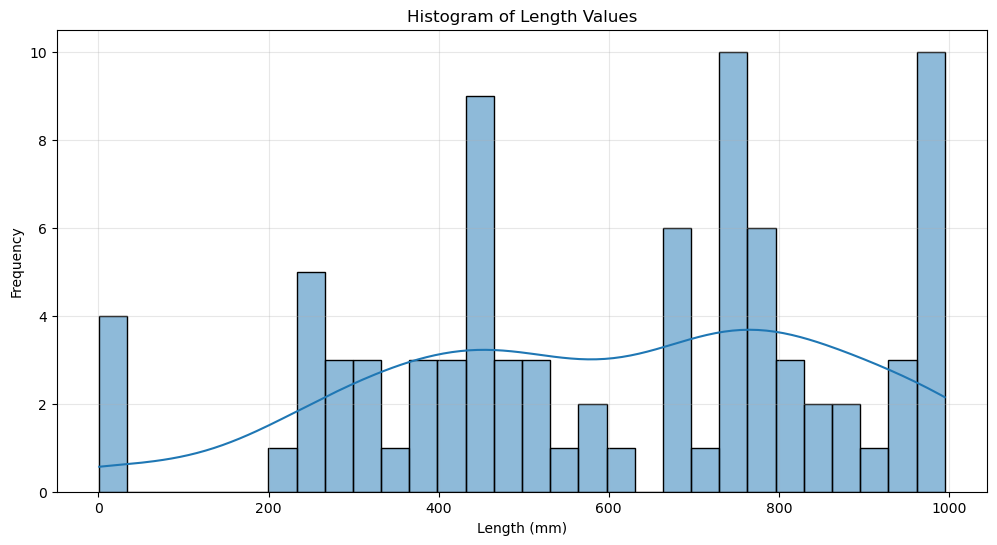

Length summary statistics:
count     86.000000
mean     604.076558
std      268.103303
min        1.007000
25%      429.500000
50%      672.500000
75%      784.500000
max      995.000000
Name: LENGTH_MM, dtype: float64

Found 4 suspiciously small length values:


,MATERIAL_GRADE,ORDER_GRADE_DESC,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_KG,CLUSTER,SI_CONTENT,MN_CONTENT,P_CONTENT,...,V_CONTENT,CU_CONTENT,NB_CONTENT,TI_CONTENT,AL_CONTENT,B_CONTENT,YIELD_STRENGTH,TENSILE_STRENGTH,ELONGATION,Supplier
12,C33J3,NaN,232,"1,522.0",1.116,30.921,NaN,0.2920,0.3230,0.0100,...,0.0,260.0,6.0,23.0,420.0,1.0,0.0,0.0,0.0,Company A GmbH
26,G2WD8,CR440Y780T-DP,184,"1,442.0",1.407,29.280,WB-U,0.2580,1.8220,0.0120,...,30.0,270.0,149.0,74.0,270.0,2.0,0.0,0.0,0.0,Company A GmbH
37,G2UB5,HR660Y760T-CP,265,"1,153.0",1.007,23.440,WB-U,0.4370,1.8850,0.0120,...,40.0,310.0,437.0,1165.0,580.0,0.0,0.0,0.0,0.0,Company A GmbH
72,NaN,DBL 4525.30,253,"1,374.8",1.054,28.610,Kaltfeinblech,Dickenschwankungen (TAN),zu dünn / Unterdicke (TAN),zu dick / Überdicke (TAN),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company A GmbH


In [114]:
# Create a histogram to see distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_supplier_1['LENGTH_MM'], bins=30, kde=True)
plt.title('Histogram of Length Values')
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics
print("Length summary statistics:")
print(df_supplier_1['LENGTH_MM'].describe())

# Identify potential outliers (very small values that could be decimal format errors)
small_values = df_supplier_1[df_supplier_1['LENGTH_MM'] < 10]
print(f"\nFound {len(small_values)} suspiciously small length values:")
small_values.head()

In [115]:
# Identify rows with suspiciously small length values - only for visual purpose
small_length_indices = [12, 26, 37, 72]

# Function to convert from German to standard format (multiply by 1000)
# This function can be enhanced further for handling different scenarios, however I'm keeping it simple for now
def fix_german_decimal(value):
    if value < 10:  # If suspiciously small
        return value * 1000
    return value

# Apply the conversion to the entire column
df_supplier_1['LENGTH_MM'] = df_supplier_1['LENGTH_MM'].apply(fix_german_decimal)

# Check the fixed values
print("Fixed length values:")
print(df_supplier_1.loc[small_length_indices, ['LENGTH_MM']])

Fixed length values:
    LENGTH_MM
12     1116.0
26     1407.0
37     1007.0
72     1054.0


In [116]:
# Fill missing values for categorical columns with "UNKNOWN"
categorical_columns = ['MATERIAL_GRADE', 'ORDER_GRADE_DESC', 'CLUSTER']
for col in categorical_columns:
    df_supplier_1[col].fillna('UNKNOWN', inplace=True)

In [117]:
# Focusing on NOMINAL_THICKNESS_MM  
# convert to float
df_supplier_1['NOMINAL_THICKNESS_MM'] = pd.to_numeric(df_supplier_1['NOMINAL_THICKNESS_MM'], errors='raise')

In [118]:
# Moving onto WIDTH_MM
# convert to float
df_supplier_1['WIDTH_MM'] = pd.to_numeric(df_supplier_1['WIDTH_MM'], errors='raise')

ValueError: Unable to parse string "1,839.0" at position 2

*We will need to handle certain rows*

In [119]:
# Identify problematic rows in WIDTH_MM
error_rows = df_supplier_1[~df_supplier_1['WIDTH_MM'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]

# Display the problematic rows
error_rows['WIDTH_MM'].count()

81

*More than 90% of the rows*

In [120]:
def clean_width(value):
    if isinstance(value, str):  # Check if it's a string
        value = value.replace(',', '')  # Remove commas (thousands separator)
        value = re.sub(r'[^0-9.]', '', value)  # Remove non-numeric characters except '.'
    try:
        return float(value)
    except ValueError:
        return None  # Return None for values that can't be converted

# Apply the cleaning function
df_supplier_1['WIDTH_MM'] = df_supplier_1['WIDTH_MM'].apply(clean_width)
df_supplier_1['WIDTH_MM'].count()  # Count non-null values

86

In [121]:
df_supplier_1['WIDTH_MM'].describe()

count      86.000000
mean     1261.183721
std       211.292087
min       727.200000
25%      1149.500000
50%      1282.500000
75%      1379.000000
max      1839.000000
Name: WIDTH_MM, dtype: float64

In [122]:
def plot_boxplot_summary(df, column_name):
    """
    Generates a boxplot and prints summary statistics for a given column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The column to visualize and summarize.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name} Values')
    plt.xlabel(column_name)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print summary statistics
    print(df[column_name].describe())


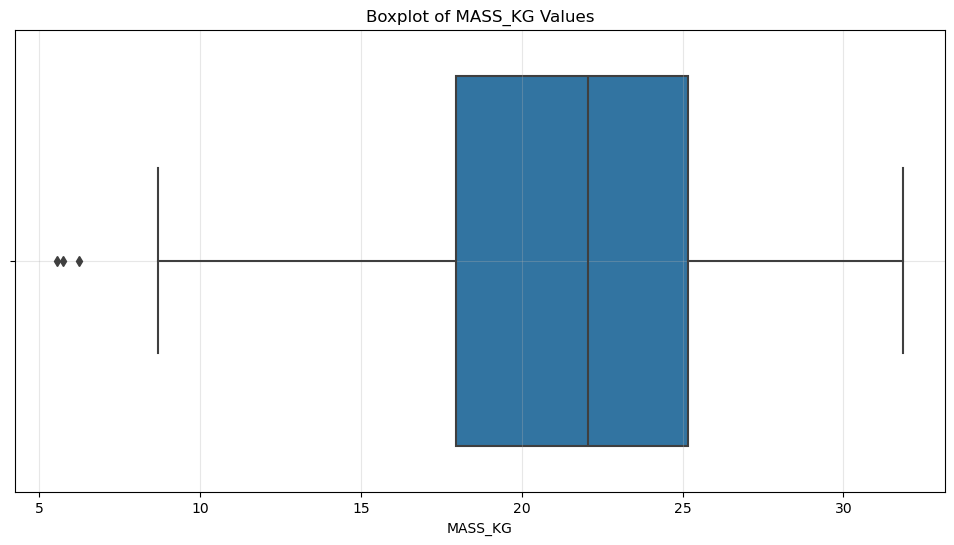

count    86.000000
mean     21.215837
std       6.148270
min       5.550000
25%      17.947500
50%      22.070000
75%      25.175000
max      31.840000
Name: MASS_KG, dtype: float64


In [123]:
# Create a histogram to see distribution
plot_boxplot_summary(df_supplier_1, 'MASS_KG')

In [124]:
# Calculate Q1, Q3, and IQR
Q1 = df_supplier_1['MASS_KG'].quantile(0.25)
Q3 = df_supplier_1['MASS_KG'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where MASS_KG is an outlier
outliers = df_supplier_1[(df_supplier_1['MASS_KG'] < lower_bound) | (df_supplier_1['MASS_KG'] > upper_bound)]

# Display rows with outliers
outliers

,MATERIAL_GRADE,ORDER_GRADE_DESC,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_KG,CLUSTER,SI_CONTENT,MN_CONTENT,P_CONTENT,...,V_CONTENT,CU_CONTENT,NB_CONTENT,TI_CONTENT,AL_CONTENT,B_CONTENT,YIELD_STRENGTH,TENSILE_STRENGTH,ELONGATION,Supplier
70,UNKNOWN,DBL 4525.30,250,1301.4,218.0,5.550,Kaltfeinblech,Rost flächig (DR3),lange Schale (TS),lange Schale offen (TS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company A GmbH
73,UNKNOWN,RobuSal®800,201,1156.7,319.0,5.740,Kaltfeinblech,Dickenschw. wegen Stop Tandemstr. (TAN),Ölung zu hoch (CL4),Stückgewicht zu niedrig (CL4),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company A GmbH
74,UNKNOWN,CS Type B,259,1222.8,249.0,6.225,Kaltfeinblech,Dickenschwankungen (TAN),Standstelle/Verfärbungen (KB2),lange Schale offen (EXT),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company A GmbH


*There are not many outliers in terms of Mass except of the above 3 - I choose to keep these rows*

In [125]:
# selecting final columns
df_supplier_1_clean = df_supplier_1[['MATERIAL_GRADE', 'ORDER_GRADE_DESC', 'NOMINAL_THICKNESS_MM', 'WIDTH_MM', 'LENGTH_MM', 'MASS_KG', 'Supplier']]
df_supplier_1_clean.head()

,MATERIAL_GRADE,ORDER_GRADE_DESC,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_KG,Supplier
0,G2UB5,SZBS800,320,856.0,787.0,16.490,Company A GmbH
1,G2UJ5,SZBS800,339,918.0,707.0,17.160,Company A GmbH
2,C3318,LICRO 500,452,1839.0,300.0,18.700,Company A GmbH
3,C3U15,S380MC mod. 4,532,1160.0,461.0,22.011,Company A GmbH
4,G3UB5,SZBE800,451,727.2,557.0,14.020,Company A GmbH


## Cleaning Dataset 2 - Company B

In [126]:
df_supplier_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRODUCT_TYPE             118 non-null    object 
 1   ORDER_ID                 136 non-null    int64  
 2   SITE                     136 non-null    object 
 3   MATERIAL_NAME            116 non-null    object 
 4   MATERIAL_NUMBER          91 non-null     float64
 5   MATERIAL_QUALITY_NORM    119 non-null    object 
 6   SURFACE_COATING          0 non-null      float64
 7   DEFECT_NOTES             116 non-null    object 
 8   NOMINAL_THICKNESS_MM     136 non-null    float64
 9   WIDTH_MM                 136 non-null    int64  
 10  LENGTH_MM                55 non-null     float64
 11  HEIGHT_MM                0 non-null      float64
 12  MASS_MIN_KG              136 non-null    int64  
 13  NUMBER_OF_COILS          0 non-null      float64
 14  DELIVERY_EARLIEST        0

In [127]:
df_supplier_2.head()

,PRODUCT_TYPE,ORDER_ID,SITE,MATERIAL_NAME,MATERIAL_NUMBER,MATERIAL_QUALITY_NORM,SURFACE_COATING,DEFECT_NOTES,NOMINAL_THICKNESS_MM,WIDTH_MM,...,HEIGHT_MM,MASS_MIN_KG,NUMBER_OF_COILS,DELIVERY_EARLIEST,DELIVERY_LATEST,INCO_TERM,BUY_NOW_EUR_PER_TON,MIN/MAX_BID_EUR_PER_TON,CO2_PER_TON_MAX_KG,VALID_UNTIL
0,SHEET,436765,1 company gmbh,S235JR,1.0038,DIN EN 10025,NaN,DEKL-S235JR / D2A EID,11.859,1509,...,NaN,2091,NaN,NaN,NaN,FCA,600.0,NaN,NaN,20/02/2025 11:00
1,SHEET,436754,1 company gmbh,S355MC,1.0976,DIN EN 10149,NaN,NaN,8.057,1011,...,NaN,2411,NaN,NaN,NaN,FCA,600.0,NaN,NaN,20/02/2025 11:00
2,SHEET,436755,1 company gmbh,NaN,1.0976,DIN EN 10149,NaN,DEKL-S355MC / D2A WEH,8.057,1010,...,NaN,2251,NaN,NaN,NaN,FKA,600.0,NaN,NaN,2025-02-20 11:00
3,SHEET,436757,1 company gmbh,S355MC,1.0976,NaN,NaN,DEKL-S355MC / D2A WEH,8.057,1011,...,NaN,2401,NaN,NaN,NaN,FCA,600.0,NaN,NaN,2025-02-20 11:00
4,SHEET,436758,1 company gmbh,S355MC,1.0976,DN EN 10149,NaN,DEKL-S355MC / D2A WEH,8.057,1010,...,NaN,2401,NaN,NaN,NaN,FCA,600.0,NaN,NaN,2025-02-20 11:00


In [128]:
# For supplier 2 I'll keep most of the column names as it is
# Add a source column to identify the supplier, I choose to create my own identifier here since 'SITE' column may change and it can break the pipeline
df_supplier_2['Supplier'] = 'Company B GmbH'

In [129]:
df_supplier_2['LENGTH_MM'].isnull().sum()

81

*The Length column has 81 null values out of 136. However, since this is a supplier dataset which would go into the inventory - filling the null values with either mean or median will not be useful as it does not show the reality*

In [130]:
# Fill missing values for categorical columns with "UNKNOWN"
categorical_columns = ['MATERIAL_NAME', 'MATERIAL_QUALITY_NORM', 'DEFECT_NOTES']
for col in categorical_columns:
    df_supplier_2[col].fillna('UNKNOWN', inplace=True)

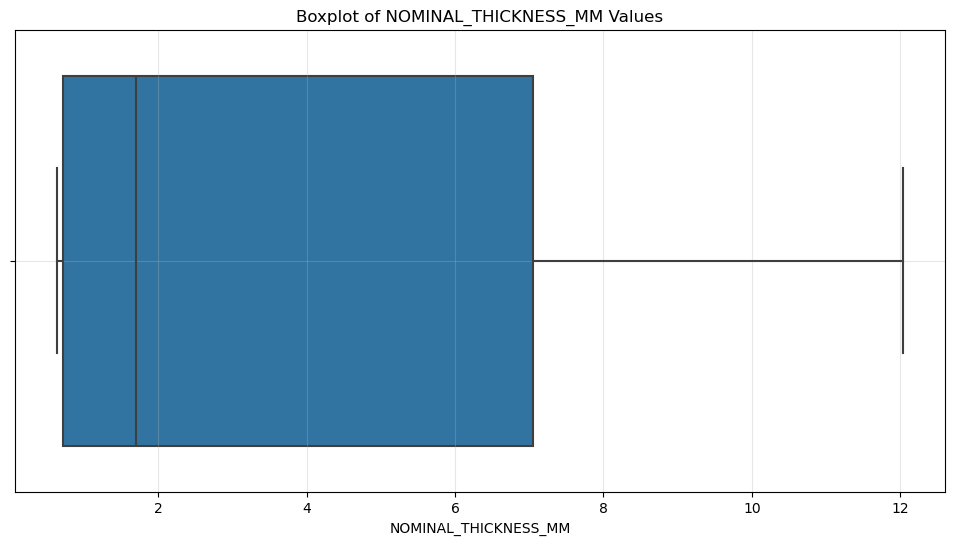

count    136.000000
mean       3.622728
std        3.886831
min        0.640000
25%        0.712750
50%        1.700000
75%        7.046500
max       12.029000
Name: NOMINAL_THICKNESS_MM, dtype: float64


In [131]:
# Focusing on NOMINAL_THICKNESS_MM
plot_boxplot_summary(df_supplier_2, 'NOMINAL_THICKNESS_MM')

*No outlier, nor does it need data type conversion*

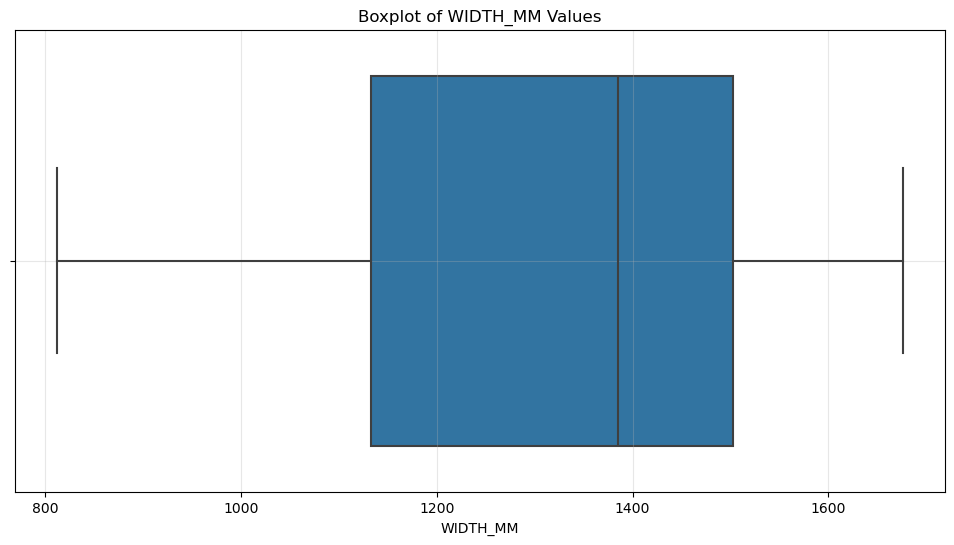

count     136.000000
mean     1302.830882
std       253.536689
min       812.000000
25%      1132.250000
50%      1385.000000
75%      1503.000000
max      1676.000000
Name: WIDTH_MM, dtype: float64


In [132]:
# Moving onto WIDTH_MM
# convert to float
plot_boxplot_summary(df_supplier_2, 'WIDTH_MM')

*Same can be said for Width*

In [133]:
# selecting final columns
df_supplier_2_clean = df_supplier_2[['MATERIAL_NAME', 'MATERIAL_QUALITY_NORM', 'NOMINAL_THICKNESS_MM', 'WIDTH_MM', 'LENGTH_MM', 'MASS_MIN_KG', 'Supplier']]
df_supplier_2_clean.head()

,MATERIAL_NAME,MATERIAL_QUALITY_NORM,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_MIN_KG,Supplier
0,S235JR,DIN EN 10025,11.859,1509,3008.0,2091,Company B GmbH
1,S355MC,DIN EN 10149,8.057,1011,2355.0,2411,Company B GmbH
2,UNKNOWN,DIN EN 10149,8.057,1010,2356.0,2251,Company B GmbH
3,S355MC,UNKNOWN,8.057,1011,2356.0,2401,Company B GmbH
4,S355MC,DN EN 10149,8.057,1010,2356.0,2401,Company B GmbH


In [134]:
# Create a standardized column mapping
supplier_2_mapping = {
    'MATERIAL_NAME': 'MATERIAL_GRADE',
    'MATERIAL_QUALITY_NORM': 'ORDER_GRADE_DESC',
    'NOMINAL_THICKNESS_MM': 'NOMINAL_THICKNESS_MM',
    'WIDTH_MM': 'WIDTH_MM',
    'LENGTH_MM': 'LENGTH_MM',
    'MASS_MIN_KG': 'MASS_KG',
    'Supplier' : 'Supplier'
}

# Rename the columns in supplier 1 dataset
df_supplier_2_clean = df_supplier_2_clean.rename(columns=supplier_2_mapping)
df_supplier_2_clean

,MATERIAL_GRADE,ORDER_GRADE_DESC,NOMINAL_THICKNESS_MM,WIDTH_MM,LENGTH_MM,MASS_KG,Supplier
0,S235JR,DIN EN 10025,11.859,1509,3008.0,2091,Company B GmbH
1,S355MC,DIN EN 10149,8.057,1011,2355.0,2411,Company B GmbH
2,UNKNOWN,DIN EN 10149,8.057,1010,2356.0,2251,Company B GmbH
3,S355MC,UNKNOWN,8.057,1011,2356.0,2401,Company B GmbH
4,S355MC,DN EN 10149,8.057,1010,2356.0,2401,Company B GmbH
...,...,...,...,...,...,...,...
131,UNKNOWN,UNKNOWN,0.800,1385,NaN,4580,Company B GmbH
132,S235JR,DIN EN 10025,11.859,1509,3008.0,2091,Company B GmbH
133,CR180BH,VDA 239-100,0.712,1432,NaN,3160,Company B GmbH
134,UNKNOWN,DIN EN 10025,12.008,1507,2506.0,3541,Company B GmbH


----
----

In [143]:
# Determine which columns are present in both datasets
common_columns = set(df_supplier_1_clean.columns).intersection(set(df_supplier_2_clean.columns))
print("Common columns:", common_columns)

Common columns: {'ORDER_GRADE_DESC', 'Supplier', 'MATERIAL_GRADE', 'LENGTH_MM', 'WIDTH_MM', 'NOMINAL_THICKNESS_MM', 'MASS_KG'}


*I will be using a UNION operation to merge the two datasets*

In [140]:
df_supplier_1_clean.shape, df_supplier_2_clean.shape

((86, 7), (136, 7))

In [161]:
# Create a combined dataset with all records from both suppliers
inventory_dataset = pd.concat([
    df_supplier_1_clean, 
    df_supplier_2_clean
], ignore_index=True)

inventory_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MATERIAL_GRADE        222 non-null    object 
 1   ORDER_GRADE_DESC      222 non-null    object 
 2   NOMINAL_THICKNESS_MM  222 non-null    float64
 3   WIDTH_MM              222 non-null    float64
 4   LENGTH_MM             141 non-null    float64
 5   MASS_KG               222 non-null    float64
 6   Supplier              222 non-null    object 
dtypes: float64(4), object(3)
memory usage: 12.3+ KB


In [162]:
inventory_dataset.duplicated().value_counts()

False    210
True      12
Name: count, dtype: int64

In [163]:
inventory_dataset.drop_duplicates(inplace=True)

In [164]:
# Final validation checks
print("Final inventory dataset shape:", inventory_dataset.shape)
print("Missing values summary:\n", inventory_dataset.isnull().sum())

# Add any additional columns needed for analysis
inventory_dataset['PROCESSING_DATE'] = pd.Timestamp.now().date()

Final inventory dataset shape: (210, 7)
Missing values summary:
 MATERIAL_GRADE           0
ORDER_GRADE_DESC         0
NOMINAL_THICKNESS_MM     0
WIDTH_MM                 0
LENGTH_MM               79
MASS_KG                  0
Supplier                 0
dtype: int64
